# Defacing pre-registration - Statistical analysis in R

## Load the simulated or collected manual ratings

In [2]:
#df <- readRDS(("../../data/simulated_normal_ratings.rds"))
df <- read.csv(file = '../../data/IXI_augmented_ratings_df.tsv', sep='\t')
# Drop columns we will not use in the analysis
df <- df[, !names(df) %in% c("dataset", "artifacts", "time_sec", "confidence", "comments", "randomized_id")]
# sort dataframe by subject ID
df <- df[order(df$subject),]
df

,rater_id,rating,defaced,subject
,<chr>,<dbl>,<int>,<int>
49,rater_03,3.45,0,12
100,rater_01,3.40,0,12
134,rater_04,3.50,0,12
192,rater_02,3.65,0,12
787,rater_04,3.90,1,12
1038,rater_02,3.50,1,12
1410,rater_03,2.75,1,12
1659,rater_01,3.40,1,12
180,rater_04,3.45,0,13


In [3]:
library(dplyr)
# When there are two ratings corresponding to one image, keep first rating only, as rm-ANOVA is not able to deal with duplicates
df_nodup <- df[!duplicated(df[c("subject", "defaced", "rater_id")]), ]
nrow(df_nodup)

print(df_nodup)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 1480

     rater_id rating defaced subject
49   rater_03   3.45       0      12
100  rater_01   3.40       0      12
134  rater_04   3.50       0      12
192  rater_02   3.65       0      12
787  rater_04   3.90       1      12
1038 rater_02   3.50       1      12
1410 rater_03   2.75       1      12
1659 rater_01   3.40       1      12
180  rater_04   3.45       0      13
238  rater_02   3.50       0      13
301  rater_01   2.75       0      13
399  rater_03   2.85       0      13
777  rater_04   3.10       1      13
1028 rater_02   3.00       1      13
1400 rater_03   3.00       1      13
1649 rater_01   2.55       1      13
516  rater_02   2.65       1      14
517  rater_02   2.80       0      14
699  rater_04   3.70       1      14
700  rater_04   3.05       0      14
1216 rater_03   2.60       1      14
1217 rater_03   2.75       0      14
1571 rater_01   3.20       1      14
1572 rater_01   2.50       0      14
812  rater_04   3.45       1      15
821  rater_04   3.60       0      15
1

## Linear mixed-effects models

We will test if including the defacing factor as fixed effect improves the model fit using a likelihood-ratio test.

In [4]:
## Fit model without defaced as fixed effect
library(lme4)
fm0 <- lmer(as.numeric(rating) ~ (1 | subject) + (1 | rater_id), data=df_nodup, REML=FALSE)
summary(fm0)
ranef(fm0)


Loading required package: Matrix



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: as.numeric(rating) ~ (1 | subject/rater_id)
   Data: df_nodup

     AIC      BIC   logLik deviance df.resid 
  1840.7   1861.9   -916.3   1832.7     1476 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5584 -0.4824  0.0691  0.5448  3.4072 

Random effects:
 Groups           Name        Variance Std.Dev.
 rater_id:subject (Intercept) 0.09212  0.3035  
 subject          (Intercept) 0.12632  0.3554  
 Residual                     0.09863  0.3141  
Number of obs: 1480, groups:  rater_id:subject, 740; subject, 185

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.12419    0.02956   105.7

$`rater_id:subject`
               (Intercept)
rater_01:12   0.0170238690
rater_01:13  -0.2583794408
rater_01:14  -0.0676818603
rater_01:15   0.0193349693
rater_01:33   0.0314044479
rater_01:34  -0.0575151669
rater_01:39  -0.1171847199
rater_01:48  -0.0089095265
rater_01:49   0.1270657427
rater_01:51   0.0277072245
rater_01:52  -0.0413679078
rater_01:56  -0.0170650875
rater_01:57   0.0857184442
rater_01:59  -0.1271069612
rater_01:67   0.0532878208
rater_01:72  -0.0281012421
rater_01:79   0.0981962378
rater_01:80   0.0890351106
rater_01:83  -0.0790179828
rater_01:92   0.1886380809
rater_01:93  -0.0337290088
rater_01:94  -0.3638268719
rater_01:95   0.0956406855
rater_01:96   0.1862186336
rater_01:97  -0.0423734739
rater_01:102 -0.5348160747
rater_01:104 -0.1814209575
rater_01:105 -0.2111876815
rater_01:126  0.1626769275
rater_01:127  0.1053184748
rater_01:128  0.0222433207
rater_01:130 -0.0975846893
rater_01:131 -0.1686987118
rater_01:132  0.0051988424
rater_01:136 -0.1583959134
rater_01

Let us check whether the residuals are normally distributed using Q-Q plot as a mean to evaluate the model fit.

Loading required package: ggplot2

Warning message:
“The following aesthetics were dropped during statistical transformation:
sample.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
sample.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


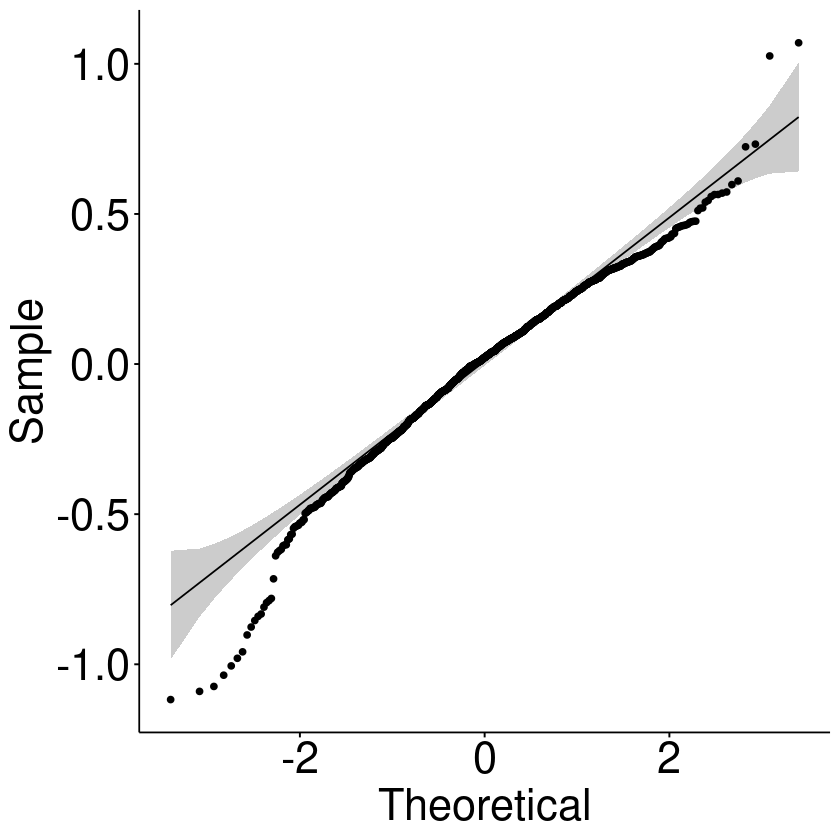

In [5]:
library(ggpubr)
res <- residuals(fm0)
ggqqplot(res) +
  theme(text = element_text(size = 26))

In [6]:
#Remove rater_04
df_nodup_w04 <- df_nodup %>%
  filter(rater_id != "rater_04")
nrow(df_nodup_w04)

[1] 1110

In [10]:
fm0 <- lmer(as.numeric(rating) ~ (1 | subject / rater_id ), data=df_nodup_w04, REML=FALSE)
summary(fm0)
ranef(fm0)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: as.numeric(rating) ~ (1 | subject/rater_id)
   Data: df_nodup_w04

     AIC      BIC   logLik deviance df.resid 
  1331.8   1351.8   -661.9   1323.8     1106 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3711 -0.5705  0.0734  0.5946  2.9385 

Random effects:
 Groups           Name        Variance Std.Dev.
 rater_id:subject (Intercept) 0.03146  0.1774  
 subject          (Intercept) 0.14921  0.3863  
 Residual                     0.11497  0.3391  
Number of obs: 1110, groups:  rater_id:subject, 555; subject, 185

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.00063    0.03109    96.5

$`rater_id:subject`
               (Intercept)
rater_01:12   0.0357096022
rater_01:13  -0.1066191056
rater_01:14   0.0206753269
rater_01:15   0.0914629464
rater_01:33   0.0372232922
rater_01:34   0.0132027488
rater_01:39  -0.0281259812
rater_01:48   0.0289972454
rater_01:49   0.0774630024
rater_01:51   0.0327301582
rater_01:52   0.0067233187
rater_01:56   0.0392095882
rater_01:57   0.0430383727
rater_01:59  -0.0222150289
rater_01:67   0.0750999720
rater_01:72  -0.0205095955
rater_01:79   0.0864013346
rater_01:80   0.1124561099
rater_01:83  -0.0035369600
rater_01:92   0.1334972093
rater_01:93   0.0166068631
rater_01:94  -0.0936602455
rater_01:95   0.0740109523
rater_01:96   0.1364287175
rater_01:97   0.0348602618
rater_01:102 -0.2062971370
rater_01:104 -0.0477013264
rater_01:105 -0.0766876099
rater_01:126  0.0749082286
rater_01:127  0.1090040598
rater_01:128  0.0731136760
rater_01:130 -0.0039616302
rater_01:131 -0.0231123052
rater_01:132  0.0318328819
rater_01:136 -0.0423109161
rater_01

In [13]:
## Fit model with defaced as fixed effect
library(lme4)
fm1 <- lmer(as.numeric(rating) ~ (1 | subject / rater_id ) + (1 | defaced / rater_id ), data=df_nodup_w04, REML=FALSE)
summary(fm1)
ranef(fm1)


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: as.numeric(rating) ~ (1 | subject/rater_id) + (1 | defaced/rater_id)
   Data: df_nodup_w04

     AIC      BIC   logLik deviance df.resid 
  1312.4   1342.5   -650.2   1300.4     1104 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6877 -0.5498  0.0688  0.5857  2.8926 

Random effects:
 Groups           Name        Variance Std.Dev.
 rater_id:subject (Intercept) 0.026137 0.16167 
 subject          (Intercept) 0.151732 0.38953 
 rater_id:defaced (Intercept) 0.005149 0.07176 
 defaced          (Intercept) 0.000000 0.00000 
 Residual                     0.113249 0.33652 
Number of obs: 1110, groups:  
rater_id:subject, 555; subject, 185; rater_id:defaced, 6; defaced, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.00063    0.04275   70.19
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


$`rater_id:subject`
               (Intercept)
rater_01:12   7.692409e-03
rater_01:13  -1.178235e-01
rater_01:14  -3.441661e-03
rater_01:15   6.032879e-02
rater_01:33   9.514508e-03
rater_01:34  -1.133727e-02
rater_01:39  -4.899228e-02
rater_01:48   3.643867e-03
rater_01:49   4.494238e-02
rater_01:51   4.655655e-03
rater_01:52  -1.822062e-02
rater_01:56   1.153901e-02
rater_01:57   1.376569e-02
rater_01:59  -4.352621e-02
rater_01:67   4.393036e-02
rater_01:72  -3.927434e-02
rater_01:79   5.405264e-02
rater_01:80   7.753636e-02
rater_01:83  -2.672321e-02
rater_01:92   9.535139e-02
rater_01:93  -8.705553e-03
rater_01:94  -1.040568e-01
rater_01:95   4.170322e-02
rater_01:96   9.778070e-02
rater_01:97   8.502488e-03
rater_01:102 -2.062921e-01
rater_01:104 -6.559264e-02
rater_01:105 -9.150568e-02
rater_01:126  4.150059e-02
rater_01:127  7.429721e-02
rater_01:128  4.190586e-02
rater_01:130 -2.631817e-02
rater_01:131 -4.332358e-02
rater_01:132  4.858291e-03
rater_01:136 -6.093643e-02
rater_01

In [14]:
#Likelihood-ratio test
anova(fm0, fm1)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fm0,4,1331.783,1351.831,-661.8914,1323.783,NA,NA,NA
fm1,6,1312.378,1342.451,-650.1890,1300.378,23.4048,2,8.273956e-06


The p-value for the likelihood-ratio test is significant (3e-8) meaning that defacing influence on the manual ratings is significant.

## Exploratory analysis


### Linear mixed-effects without rater_04

In [ ]:
#Remove rater_04
df_nodup_w04 <- df_nodup %>%
  filter(rater_id != "rater_04")
nrow(df_nodup_w04)

### Linear mixed-effects with only poor quality and excluded scans

In [ ]:
library(dplyr)
df_poor <- df %>%
  filter(rating <= 2.45)
nrow(df_poor)

In [ ]:
## Fit model without defaced as random effect
library(lme4)
fm0 <- lmer(as.numeric(rating) ~ (1 | subject) + (1 | rater_id), data=df_poor)
summary(fm0)
ranef(fm0)

In [ ]:
## Fit model with defaced as random effect
library(lme4)
fm1 <- lmer(as.numeric(rating) ~ (1 | subject) + (1 | rater_id) + (1| defaced:rater_id), data=df_poor)
summary(fm1)
ranef(fm1)

In [ ]:
#Likelihood-ratio test
anova(fm0, fm1)

## Sanity check with simulated data

We verify that the model selected is able to detect differences when a bias has been manually introduced in simulated data and vice versa that the model does not detect differences when no bias was introduced. The simulated data were generated by running `../../data/simulate_data.R`

In [7]:
library(lme4)
# Load simulated data
simulated_df <- readRDS(("../../data/simulated_normal_ratings.rds"))

#Fit the models
fm0 <- lmer(as.numeric(rating) ~ (1 | subject) + (1 | rater_id), data=simulated_df)
fm1 <- lmer(as.numeric(rating) ~ (1 | subject) + (1 | rater_id) + (1| defaced:rater_id), data=simulated_df)

#Likelihood-ratio test
anova(fm0, fm1)

boundary (singular) fit: see help('isSingular')

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fm0,4,11136.61,11157.81,-5564.305,11128.61,NA,NA,NA
fm1,5,11080.29,11106.79,-5535.145,11070.29,58.31997,1,2.227708e-14


All good, we see that the simulated bias is detected by our linear mixed-effects model.

In [8]:
library(lme4)
# Load the simulated data without bias
simulated_df_no_bias <- readRDS(("../../data/simulated_normal_nobias_ratings.rds"))

#Fit the models
fm0 <- lmer(as.numeric(rating) ~ (1 | subject) + (1 | rater_id), data=simulated_df_no_bias)
fm1 <- lmer(as.numeric(rating) ~ (1 | subject) + (1 | rater_id) + (1| defaced:rater_id), data=simulated_df_no_bias)

#Likelihood-ratio test
anova(fm0, fm1)

boundary (singular) fit: see help('isSingular')

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fm0,4,10937.58,10958.78,-5464.792,10929.58,NA,NA,NA
fm1,5,10939.58,10966.08,-5464.792,10929.58,3.637979e-12,1,0.9999985


We also verified that no bias is found by our models when it is not introduced in the simulated data.